In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from parse import parse
from tqdm import tqdm

from alphaMusic.utils.fls_utils import load_from_pkl
import alphaMusic.evaluation as evl

In [14]:
sns.set()
sns.set_context("paper")
cste = 25
params = {
    'backend': 'ps',
    'axes.labelsize': cste,
    'axes.titlesize': cste,
    'font.size': cste,
    'legend.fontsize': cste,
    'xtick.labelsize': cste,
    'ytick.labelsize': cste,
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': 'ptmrr8re',
}

sns.set_style("whitegrid", {
    'pgf.texsystem': 'xelatex',  # pdflatex, xelatex, lualatex
    'text.usetex': True,
    'font.family': 'serif',
    'axes.labelsize': cste,
    'axes.titlesize': cste,
    'font.size': cste,
    'legend.fontsize': cste,
    'xtick.labelsize': cste,
    'ytick.labelsize': cste,
    'font.serif': [],
    'lines.linewidth':1.5,
})
plt.rcParams.update(params)

pal = sns.cubehelix_palette(7, start=0.5, rot=-0.5,dark=0.3, light=.75, reverse=True, hue=1.)

fig_width_pt = 700.6937  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27               # Convert pt to inch
golden_mean = (np.sqrt(5) - 1.0) / 2.0         # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width * golden_mean      # height in inches
fig_size = np.array([fig_width, fig_height])

In [15]:
path_to_results = Path('..','recipes','EUSIPCO22')
assert path_to_results.exists()

files = path_to_results.glob('results_locata*.csv')
exp_name = 'results_locata_task:{task}_array:{array}_rec:{rec}.csv'

results = pd.DataFrame()
for file in files:
    print(file)
    params = parse(exp_name, str(file.name))
    df = pd.read_csv(file)
    results = pd.concat([results, df], ignore_index=True)

../recipes/EUSIPCO22/results_locata_task:1_array:dicit_rec:1.csv
../recipes/EUSIPCO22/results_locata_task:2_array:dicit_rec:1.csv
../recipes/EUSIPCO22/results_locata_task:3_array:benchmark2_rec:2.csv
../recipes/EUSIPCO22/results_locata_task:3_array:dicit_rec:2.csv
../recipes/EUSIPCO22/results_locata_task:1_array:benchmark2_rec:3.csv
../recipes/EUSIPCO22/results_locata_task:3_array:benchmark2_rec:1.csv
../recipes/EUSIPCO22/results_locata_task:1_array:benchmark2_rec:1.csv
../recipes/EUSIPCO22/results_locata_task:2_array:dummy_rec:4.csv
../recipes/EUSIPCO22/results_locata_task:2_array:benchmark2_rec:1.csv
../recipes/EUSIPCO22/results_locata_task:1_array:dummy_rec:6.csv
../recipes/EUSIPCO22/results_locata_task:3_array:dummy_rec:2.csv
../recipes/EUSIPCO22/results_locata_task:1_array:dummy_rec:4.csv
../recipes/EUSIPCO22/results_locata_task:3_array:dummy_rec:1.csv
../recipes/EUSIPCO22/results_locata_task:2_array:benchmark2_rec:3.csv
../recipes/EUSIPCO22/results_locata_task:3_array:benchmark2_

In [16]:
results

,Unnamed: 0,timestamp,task,array,rec,VAD_0,DOA_0,J,MUSIC_0,MUSIC_time,...,MUSIC_2,MUSIC_3,aMUSIC_2,aMUSIC_3,NormMUSIC_2,NormMUSIC_3,aNormMUSIC_2,aNormMUSIC_3,SRP_PHAT_2,SRP_PHAT_3
0,0,0.1125,1.0,dicit,1.0,1.0,147.972212,1.0,146.0,0.010604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.1500,1.0,dicit,1.0,1.0,147.972212,1.0,146.0,0.009349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.1875,1.0,dicit,1.0,1.0,147.972212,1.0,146.0,0.009775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.2250,1.0,dicit,1.0,1.0,147.972212,1.0,145.0,0.010397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.2625,1.0,dicit,1.0,1.0,147.972212,1.0,145.0,0.010223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5441,372,24.0000,3.0,dicit,3.0,1.0,117.533313,1.0,115.0,0.010684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5442,373,24.0375,3.0,dicit,3.0,1.0,117.535793,1.0,115.0,0.009835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5443,374,24.0750,3.0,dicit,3.0,1.0,117.534710,1.0,115.0,0.010705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5444,375,24.1125,3.0,dicit,3.0,1.0,117.513779,1.0,115.0,0.010060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


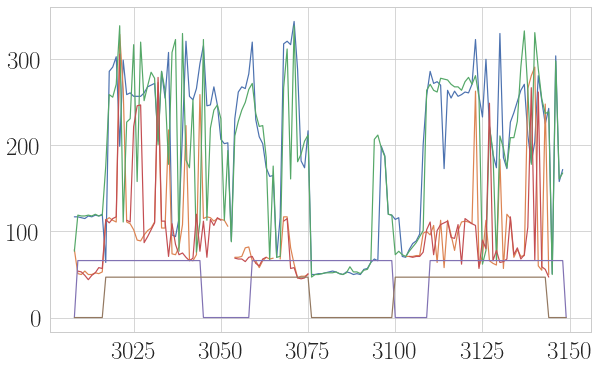

In [17]:
df = results
curr_df = df.loc[(df['task'] == 2) & (df['array'] == 'benchmark2') & (df['rec'] == 3)]

plt.figure(figsize=fig_size)
plt.plot(curr_df['MUSIC_0'])
plt.plot(curr_df['MUSIC_1'])
plt.plot(curr_df['aMUSIC_0'])
plt.plot(curr_df['aMUSIC_1'])
plt.plot(curr_df['VAD_0'] * curr_df['DOA_0'])
plt.plot(curr_df['VAD_1'] * curr_df['DOA_1'])

In [19]:
df = pd.DataFrame()

c = 0

for r, row in tqdm(results.iterrows(), total=df.shape[0]):
    
    task = row['task']
    array = row['array']
    rec = row['rec']
    ts = row['timestamp']
    
    J = int(row['J'])
    
            
    for algo in ['MUSIC', 'aMUSIC', 'NormMUSIC', 'aNormMUSIC', 'SRP_PHAT']:
        df.at[c,'task'] = task
        df.at[c,'array'] = array
        df.at[c,'rec'] = rec
        df.at[c,'timestamp'] = ts

        if J == 0:
            continue

        doas_ref = []
        for j in range(J):
            doas_ref.append(row[f'DOA_{j}'])
        
        doas_est = []
        for j in range(J):
            doa = row[f'{algo}_{j}']
            if doa > 180:
                doa = 360 - doa
                
            doas_est.append(row[f'{algo}_{j}'])
        
        # compute metrics
        metrics = evl.compute_ssl_metrics(doas_est, doas_ref)
        
        df.at[c,'algo'] = algo
        df.at[c,'MAE'] = metrics['MAE']
        df.at[c,'RMSE'] = metrics['RMSE']
        df.at[c,'ACC5'] = metrics['ACC5']
        df.at[c,'ACC10'] = metrics['ACC10']
        df.at[c,'MISS'] = metrics['MISS']
        df.at[c,'TIME'] = row[f'{algo}_time']
        
        c += 1
    
#     df.at[r,'algo'] = row['algo']

#     df.at[r,'MAE'] = metrics['MAE']
#     df.at[r,'RMSE'] = metrics['RMSE']
#     df.at[r,'ACC5'] = metrics['ACC5']
#     df.at[r,'ACC10'] = metrics['ACC10']
#     df.at[r,'MISS'] = metrics['MISS']
    
#     # params
#     df.at[r,'SNR'] = row['SNR']
#     df.at[r,'RT60'] = row['RT60']
#     df.at[r,'DRR'] = row['DRR']
#     df.at[r,'n_mics'] = row['n_mics']
#     df.at[r,'n_srcs'] = row['n_srcs']
#     df.at[r,'alpha'] = row['alpha']
#     df.at[r,'p'] = row['p']
#     df.at[r,'time'] = row['time']

5446it [00:35, 154.59it/s]


In [20]:
df.groupby(['task','array','algo']).mean('MAE')['MAE']

task  array       algo      
1.0   benchmark2  MUSIC          2.144017
                  NormMUSIC      1.998788
                  SRP_PHAT       1.836069
                  aMUSIC         2.906557
                  aNormMUSIC     1.826181
      dicit       MUSIC          3.089739
                  NormMUSIC      2.744869
                  SRP_PHAT       4.417404
                  aMUSIC         4.068812
                  aNormMUSIC     3.339739
      dummy       MUSIC          7.769904
                  NormMUSIC      1.249024
                  SRP_PHAT       1.772488
                  aMUSIC         6.770025
                  aNormMUSIC     1.273914
2.0   benchmark2  MUSIC         15.607137
                  NormMUSIC     16.353517
                  SRP_PHAT      20.285924
                  aMUSIC        15.388471
                  aNormMUSIC    17.433621
      dicit       MUSIC         10.864078
                  NormMUSIC     10.392493
                  SRP_PHAT      16.193346
     

In [21]:
algos = df['algo'].unique()
tasks = np.sort(df['task'].unique())
arrays = df['array'].unique()

print(algos)
print(tasks)
print(arrays)

res_locata = pd.DataFrame()

row = 0
for task in tasks:
    for algo in algos:
        for array in arrays:    
            
            curr_df = df.loc[(df['array'] == array) & (df['task'] == task) & (df['algo'] == algo)].dropna()
        
            mean = np.mean(curr_df['MAE'])
            std = np.std(curr_df['MAE'])
        
            res_locata.at[row, 'task'] = task
            res_locata.at[row, 'algo'] = algo
            res_locata.at[row, f'{array}'] = '%1.2f \pm %1.2f' % (mean, std)
        row += 1
        
        
#         plt.figure(figsize=fig_size)
#         plt.title(f'{array} {rec}')
#         sns.boxplot(x='rec',y='MAE',hue='algo',data=df.loc[(df['task']==rec) & (df['array']==array)])

['MUSIC' 'aMUSIC' 'NormMUSIC' 'aNormMUSIC' 'SRP_PHAT']
[1. 2. 3.]
['dicit' 'benchmark2' 'dummy']


In [9]:
res_locata.groupby(['task','algo']).sum()

dicit       benchmark2            dummy
task algo                                                         
1.0  MUSIC         3.09 \pm 7.91    2.14 \pm 1.66   7.77 \pm 16.62
     NormMUSIC     2.74 \pm 6.85    2.00 \pm 6.64    1.25 \pm 3.46
     SRP_PHAT     4.42 \pm 10.92    1.84 \pm 2.13    1.77 \pm 5.06
     aMUSIC        4.07 \pm 9.57    2.91 \pm 3.43   6.77 \pm 15.80
     aNormMUSIC    3.34 \pm 9.40    1.83 \pm 6.25    1.27 \pm 3.71
2.0  MUSIC       10.86 \pm 13.73  15.61 \pm 15.93  24.56 \pm 15.26
     NormMUSIC   10.39 \pm 14.45  16.35 \pm 14.71  22.30 \pm 15.68
     SRP_PHAT    16.19 \pm 14.18  20.29 \pm 16.24  17.35 \pm 16.09
     aMUSIC      12.48 \pm 13.87  15.39 \pm 15.15  24.31 \pm 15.23
     aNormMUSIC  10.81 \pm 14.12  17.43 \pm 15.45  23.04 \pm 15.38

In [ ]:
plt.figure(figsize=fig_size)
sns.barplot(x='task',y='TIME',hue='algo',data=df)

In [25]:
df.groupby(['task','array','algo']).mean('TIME')['TIME']

task  array       algo      
1.0   benchmark2  MUSIC         0.021807
                  NormMUSIC     0.021376
                  SRP_PHAT      0.069443
                  aMUSIC        0.037161
                  aNormMUSIC    0.037120
      dicit       MUSIC         0.010161
                  NormMUSIC     0.009777
                  SRP_PHAT      0.026275
                  aMUSIC        0.019085
                  aNormMUSIC    0.019041
      dummy       MUSIC         0.008452
                  NormMUSIC     0.008159
                  SRP_PHAT      0.029019
                  aMUSIC        0.010951
                  aNormMUSIC    0.010805
2.0   benchmark2  MUSIC         0.021832
                  NormMUSIC     0.021348
                  SRP_PHAT      0.071931
                  aMUSIC        0.037997
                  aNormMUSIC    0.037798
      dicit       MUSIC         0.010445
                  NormMUSIC     0.009934
                  SRP_PHAT      0.028080
                  aMUSIC    